In [109]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv("london_merged.csv")
print(data.shape)
data.head()

(17414, 10)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


###  Preprocessing Data for EDA

In [112]:
data.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [113]:
data["timestamp"]=pd.to_datetime(data["timestamp"])
data.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [114]:
data["season"] = data["season"].replace(0,"spring").replace(1,"summer").replace(2,"autumn").replace(3,"winter")

In [115]:
data["is_holiday"] = data["is_holiday"].replace(0,"not holiday").replace(1,"holiday")

In [116]:
data["weather_code"] = data["weather_code"].replace(1,"Clear").replace(2,"scattered clouds / few clouds").replace(3,"Broken clouds").replace(4,"Cloudy").replace(7,"Rain/ light Rain shower/ Light rain").replace(10,"rain with thunderstorm").replace(26,"snowfall").replace(94,"Freezing Fog")

In [117]:
data["year"] = data["timestamp"].dt.year
data["month"] = data["timestamp"].dt.month
data["day"] = data["timestamp"].dt.day
data["hour"] = data["timestamp"].dt.hour
data["datetime-dayofweek"] = data["timestamp"].dt.dayofweek
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,datetime-dayofweek
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,not holiday,1.0,winter,2015,1,4,0,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,not holiday,1.0,winter,2015,1,4,1,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,not holiday,1.0,winter,2015,1,4,2,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,not holiday,1.0,winter,2015,1,4,3,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,not holiday,1.0,winter,2015,1,4,4,6


In [118]:
data.loc[data["datetime-dayofweek"] == 0, "weekday"] = "Monday"
data.loc[data["datetime-dayofweek"] == 1, "weekday"] = "Tuesday"
data.loc[data["datetime-dayofweek"] == 2, "weekday"] = "Wednesday"
data.loc[data["datetime-dayofweek"] == 3, "weekday"] = "Thursday"
data.loc[data["datetime-dayofweek"] == 4, "weekday"] = "Friday"
data.loc[data["datetime-dayofweek"] == 5, "weekday"] = "Saturday"
data.loc[data["datetime-dayofweek"] == 6, "weekday"] = "Sunday"
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,datetime-dayofweek,weekday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,not holiday,1.0,winter,2015,1,4,0,6,Sunday
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,not holiday,1.0,winter,2015,1,4,1,6,Sunday
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,not holiday,1.0,winter,2015,1,4,2,6,Sunday
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,not holiday,1.0,winter,2015,1,4,3,6,Sunday
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,not holiday,1.0,winter,2015,1,4,4,6,Sunday


In [119]:
column = ["year","month","day","hour","weekday","cnt","t1","t2","hum","wind_speed","weather_code","is_holiday","is_weekend","season"]
data = data[column]
data.head()

,year,month,day,hour,weekday,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015,1,4,0,Sunday,182,3.0,2.0,93.0,6.0,Broken clouds,not holiday,1.0,winter
1,2015,1,4,1,Sunday,138,3.0,2.5,93.0,5.0,Clear,not holiday,1.0,winter
2,2015,1,4,2,Sunday,134,2.5,2.5,96.5,0.0,Clear,not holiday,1.0,winter
3,2015,1,4,3,Sunday,72,2.0,2.0,100.0,0.0,Clear,not holiday,1.0,winter
4,2015,1,4,4,Sunday,47,2.0,0.0,93.0,6.5,Clear,not holiday,1.0,winter


## 분석

-연도별 대여 횟수를 비교했을 때 큰차이가 없는 것으로 보인다.

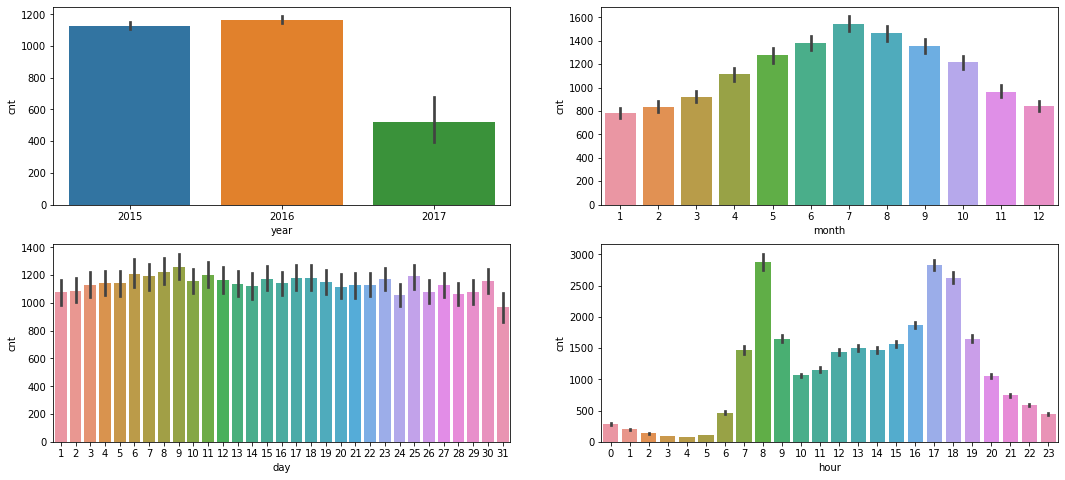

In [120]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)

sns.barplot(data=data, x="year", y="cnt", ax=ax1)
sns.barplot(data=data, x="month", y="cnt", ax=ax2)
sns.barplot(data=data, x="day", y="cnt", ax=ax3)
sns.barplot(data=data, x="hour", y="cnt", ax=ax4)
plt.show()

### 년 , 월 ,일 시간당 대여횟수를 그래프로 나타냈습니다. 그래프의 내용으로 몇가지 추론을 할 수 있습니다.
- 년도가 지날수록 성장한 것으로 보이지는 않습니다. 2017년 데이터는 부족합니다
- 날짜는 대여횟수에 큰 영향이 없는 것으로 보입니다
- 6-8월에 대여횟수가 많은 것으로 보입니다.
- 7-9시 , 17-19시에 대여횟수가 많은 것으로 보입니다

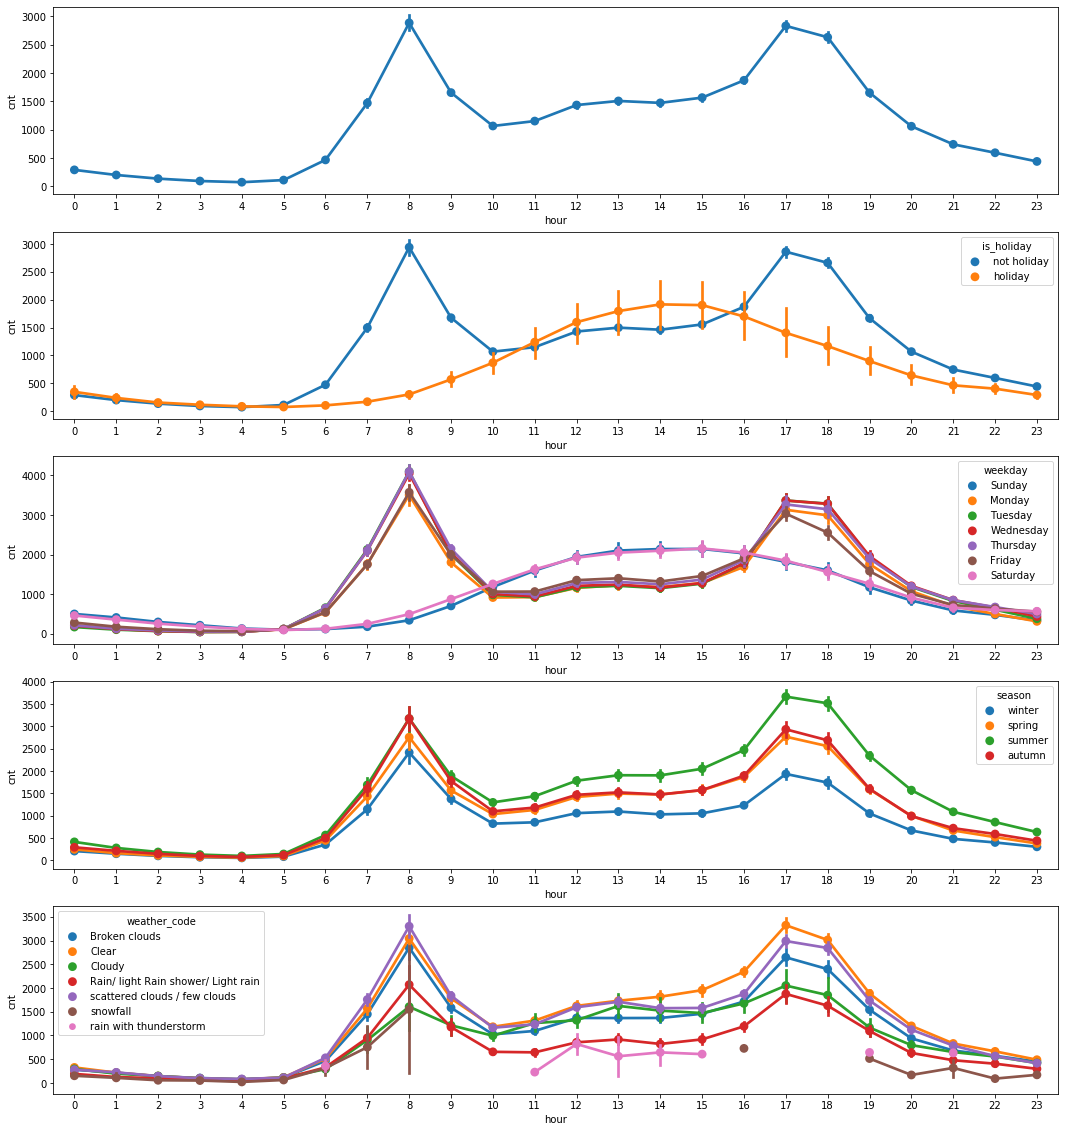

In [121]:
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1)

figure.set_size_inches(18, 20)

sns.pointplot(data=data, x="hour", y="cnt", ax=ax1)
sns.pointplot(data=data, x="hour", y="cnt", hue="is_holiday", ax=ax2)
sns.pointplot(data=data, x="hour", y="cnt", hue="weekday", ax=ax3)
sns.pointplot(data=data, x="hour", y="cnt", hue="season", ax=ax4)
sns.pointplot(data=data, x="hour", y="cnt", hue="weather_code", ax=ax5)

plt.show()

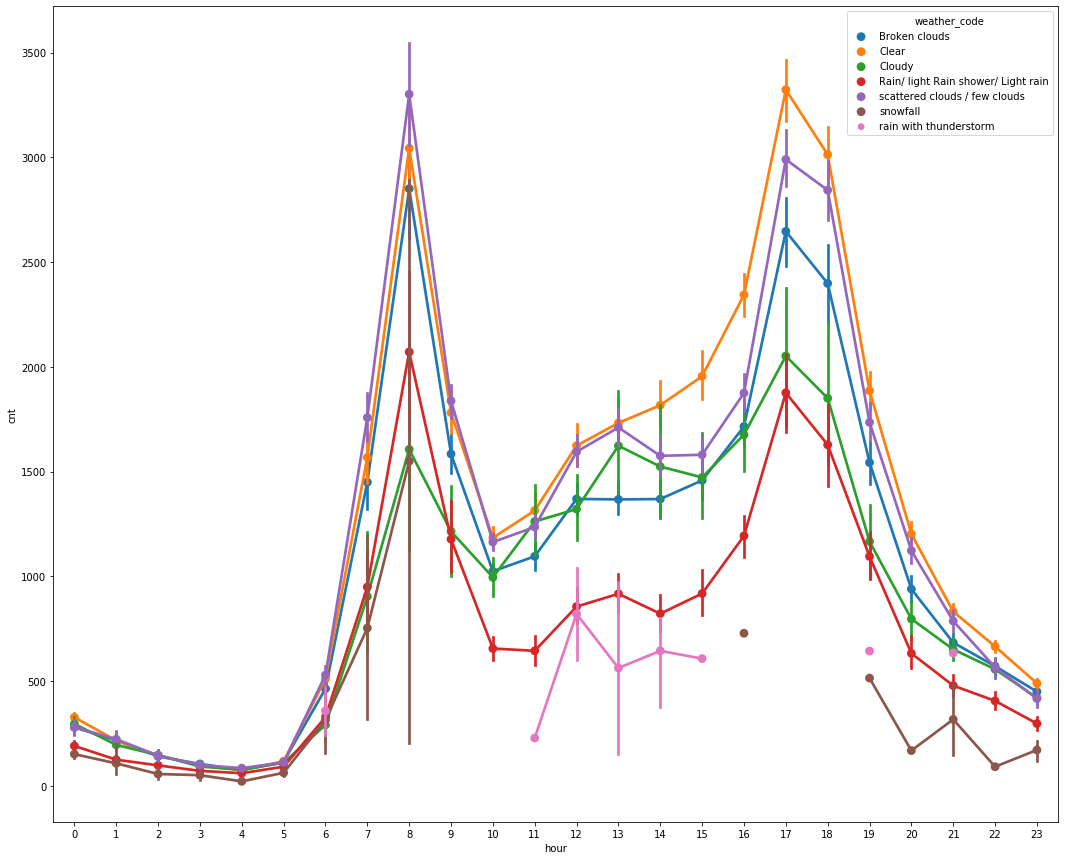

In [122]:
plt.figure(figsize=[18,15])
sns.pointplot(data=data, x="hour", y="cnt", hue="weather_code")
plt.show()

### 자세히 살펴보기 위해 시간당 대여횟수에 다양한 조건을 넣은 그래프를 만들었습니다. 의미있는 결과를 확인 할 수 있습니다.
- 7-9시,17-19시 사이에 대여횟수가 증가하는 것을 확인할 수 있습니다. 자세한 고객층을 확인해야하지만 , 출퇴근 시간이나 등하교시간에 자전거 대여량이 많이 늘어난다고 유추할 수 있습니다. 해당 고객층에 대한 타켓 마케팅 방안을 마련하면 좋은 효과가 기대됩니다.
- 쉬는날과 쉬지 않는 날의 대여 모습이 다릅니다. 쉬지 않는 날에는 출퇴근 시간,등하교 시간에 대여량이 늘지만 쉬는 날의 경우 점심 시간에 대여량이 늘어납니다. 쉬는날과 쉬지않는 날 다른 방식의 마케팅이 필요해보입니다.
- 비슷한 맥락으로 요일별로 비교를 해보면 주말과 평일의 차이가 보입니다. 마찬가지로 주말과 평일을 구분하여 서비스를 제공해야 합니다.
- 계절,날씨가 자전거 대여량에 미치는 영향은 일반적인 상식과 일치해 보입니다. 자전거를 타기에 좋은 여름에 대여량이 가장 많고, 자전거를 타기에 좋지 않은 겨울에 대여량이 가장 적습니다. 악천후나 날씨가 좋지 않은 날에는 대여량이 적고, 날씨가 좋은 날에는 대여량이 늘어납니다.